<a href="https://colab.research.google.com/github/iyakiwan/NN-tensorflow/blob/master/SubmissionTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penjelasan Dataset

Link dataset : https://www.kaggle.com/c/bike-sharing-demand/data


## Deskripsi Data
<b>datetime</b> - hourly date + timestamp  <br>
<b>season</b> -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
<b>holiday</b> - whether the day is considered a holiday<br>
<b>workingday</b> - whether the day is neither a weekend nor holiday<br>
<b>weather</b> - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
<b>temp</b> - temperature in Celsius<br>
<b>atemp</b> - "feels like" temperature in Celsius<br>
<b>humidity</b> - relative humidity<br>
<b>windspeed</b> - wind speed<br>
<b>casual</b> - number of non-registered user rentals initiated<br>
<b>registered</b> - number of registered user rentals initiated<br>
<b>count</b> - number of total rentals<br>



In [ ]:
#Import Libary yang di perlukan
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Memasukkan dataset(csv) ke libary pandas
df = pd.read_csv('train.csv')
display(df)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
#Mengecek informasi dataset untuk preprossesing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Merubah tipe data yang awalnya object menjadi datetime, untuk mempermudah pengolahan
df['datetime'] = pd.to_datetime(df['datetime'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None

In [ ]:
# Membuat dataframe baru yang akan digunakan untuk time series
df_baru = pd.concat([df['datetime'], df['temp'],], axis=1)
display(df_baru)

,datetime,temp
0,2011-01-01 00:00:00,9.84
1,2011-01-01 01:00:00,9.02
2,2011-01-01 02:00:00,9.02
3,2011-01-01 03:00:00,9.84
4,2011-01-01 04:00:00,9.84
...,...,...
10881,2012-12-19 19:00:00,15.58
10882,2012-12-19 20:00:00,14.76
10883,2012-12-19 21:00:00,13.94
10884,2012-12-19 22:00:00,13.94


In [ ]:
#Mengecek informasi dataframe yang baru
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10886 non-null  datetime64[ns]
 1   temp      10886 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 170.2 KB


In [ ]:
# mengecek apakah ada nilai yang hilang pada dataframe hasil prosessing
df_baru.isnull().sum()

datetime    0
temp        0
dtype: int64

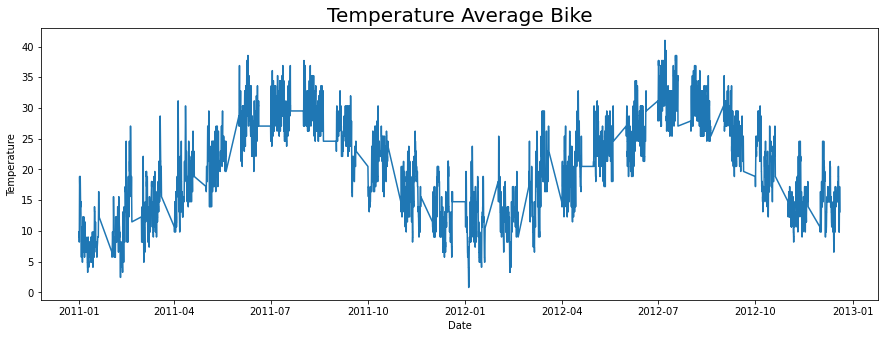

In [ ]:
#Melihat pola data pada dataframe hasil prosessing
dates = df_baru['datetime'].values
temp  = df_baru['temp'].values

plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Temperature Average Bike',
          fontsize=20);

In [ ]:
# Menentukan index split untuk train secara manual
total_row = len(df_baru.index)
print("Total Index : ", total_row)
row_train = int(total_row * 0.8)
print("Total train : ", row_train)

Total Index :  10886
Total train :  8708


In [ ]:
# Membagi data train sebesar 80 %
df_train = df_baru[df_baru.index<=row_train - 1]
df_train

,datetime,temp
0,2011-01-01 00:00:00,9.84
1,2011-01-01 01:00:00,9.02
2,2011-01-01 02:00:00,9.02
3,2011-01-01 03:00:00,9.84
4,2011-01-01 04:00:00,9.84
...,...,...
8703,2012-08-05 00:00:00,30.34
8704,2012-08-05 01:00:00,30.34
8705,2012-08-05 02:00:00,30.34
8706,2012-08-05 03:00:00,29.52


In [ ]:
# Membagi data validation sebesar 20 %
df_val = df_baru[df_baru.index>=row_train]
df_val

,datetime,temp
8708,2012-08-05 05:00:00,29.52
8709,2012-08-05 06:00:00,29.52
8710,2012-08-05 07:00:00,30.34
8711,2012-08-05 08:00:00,31.16
8712,2012-08-05 09:00:00,32.80
...,...,...
10881,2012-12-19 19:00:00,15.58
10882,2012-12-19 20:00:00,14.76
10883,2012-12-19 21:00:00,13.94
10884,2012-12-19 22:00:00,13.94


In [ ]:
#Fungsi untuk konversi menjadi tipe numpy dan mengembalikan label dan atribut dari dataset dalam bentuk batch
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
#Fungsi untuk mencari nilai mae pada dataset
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

(min, max) = minmax(temp)
vMae = (max-min) * 0.1
# vMae = 7.0
vMae

4.018

In [ ]:
#Membuat model sequential
dates_train = df_train['datetime'].values
temp_train  = df_train['temp'].values
dates_val = df_val['datetime'].values
temp_val  = df_val['temp'].values

train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=10000)
val_set = windowed_dataset(temp_val, window_size=60, batch_size=100, shuffle_buffer=10000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(60, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(1),
])

In [ ]:
#menetukan loss function serta optimizer
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
#membuat callback dari class myCallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') is not None and logs.get('mae') <= vMae and logs.get('loss') <= vMae): 
      print("\nMae telah <10%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#pelatihan model dengan total eproch 20 dan 87 step
num_epochs = 20
history = model.fit(train_set, epochs=num_epochs, callbacks=[callbacks], verbose=2)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

87/87 - 8s - loss: 19.5175 - mae: 20.0175
Epoch 2/20
87/87 - 8s - loss: 19.1737 - mae: 19.6736
Epoch 3/20
87/87 - 8s - loss: 18.7977 - mae: 19.2975
Epoch 4/20
87/87 - 8s - loss: 18.0979 - mae: 18.5977
Epoch 5/20
87/87 - 8s - loss: 16.4035 - mae: 16.9029
Epoch 6/20
87/87 - 8s - loss: 11.1822 - mae: 11.6734
Epoch 7/20
87/87 - 8s - loss: 6.0212 - mae: 6.5090
Epoch 8/20
87/87 - 8s - loss: 3.5789 - mae: 4.0515
Epoch 9/20

Mae telah <10%!
87/87 - 8s - loss: 2.5067 - mae: 2.9698


Text(0.5, 1.0, 'Training History')

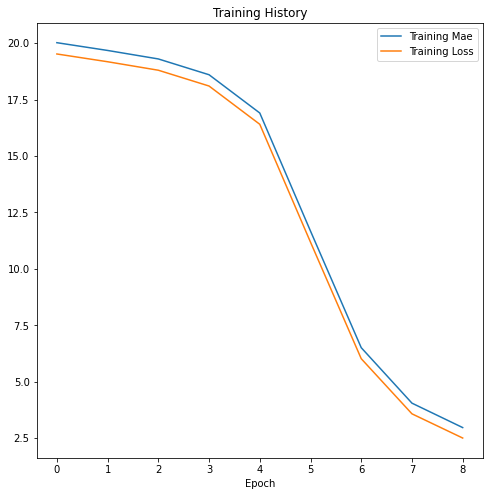

In [ ]:
#Melihat grafik dari actuasi train dan val serta lossnya menggunakan libary matplotlib.pyplot
import matplotlib.pyplot as plt
epochs = len(history.history['loss'])

mae = history.history['mae']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, mae, label='Training Mae')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training History')

In [ ]:
#Melakuakn validasi menggunakan data validation
(val_loss, val_mae) = model.evaluate(val_set)
print("Result Validation Loss : ", val_loss)
print("Result Validation MAE : ", val_mae)

22/22 [==============================] - 1s 30ms/step - loss: 1.8491 - mae: 2.3026
Result Validation Loss :  1.8490735292434692
Result Validation MAE :  2.302565097808838
